## CASE STUDY

## Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer

## Loading the dataset

In [2]:
md_data = pd.read_csv("mcdonalds.csv")
md_data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


The data set contains responses from **1453 adult Australian consumers** relating to their perceptions of McDonald’s 

## Exploring the Dataset

In [3]:
md_data.columns.tolist()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [4]:
md_data.shape

(1453, 15)

In [5]:
md_data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


Looking at the data quickly reveals that the segmentation variables (McDonald's perception) are not numerical but rather verbal.

In [6]:
md_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [7]:
md_data.describe

<bound method NDFrame.describe of      yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  G

In [8]:
md_data.value_counts()

yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  healthy  disgusting  Like          Age  VisitFrequency         Gender
No     Yes         No     Yes        Yes     Yes   Yes    No     No         No       Yes         I hate it!-5  59   Never                  Female    3
Yes    Yes         No     Yes        No      Yes   Yes    Yes    No         No       No          +4            38   Once a month           Female    3
                                     Yes     Yes   Yes    Yes    No         No       No          +2            20   Once a month           Male      3
                                                                                                 +4            30   Once a month           Female    2
                                                                                                 I love it!+5  26   More than once a week  Female    2
                                                                                                   

In [9]:
md_data['Like']= md_data['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

In [11]:
md_x = md_data.iloc[:, 0:11]

md_x = (md_x == "Yes").astype(int)
md_x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [12]:
# Calculating and rounding the column means
columnMeans = np.round(md_x.mean(), 2)
columnMeans

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

## PCA

In [13]:
md_pca = PCA()
md_pca.fit(md_x)

print(pd.DataFrame({'Standard deviation': np.sqrt(md_pca.explained_variance_),'Proportion of variance': md_pca.explained_variance_ratio_, 'Cumulative Proportion:': np.cumsum(md_pca.explained_variance_ratio_)}))

    Standard deviation  Proportion of variance  Cumulative Proportion:
0             0.757050                0.299447                0.299447
1             0.607456                0.192797                0.492244
2             0.504619                0.133045                0.625290
3             0.398799                0.083096                0.708386
4             0.337405                0.059481                0.767866
5             0.310275                0.050300                0.818166
6             0.289697                0.043849                0.862015
7             0.275122                0.039548                0.901563
8             0.265251                0.036761                0.938323
9             0.248842                0.032353                0.970677
10            0.236903                0.029323                1.000000


In [14]:
std_dev = np.sqrt(md_pca.explained_variance_)
std_dev_rounded = np.round(std_dev, 1)
print("Standard deviations (1, .., p=11):")
print(std_dev_rounded)

Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [15]:
pca = PCA()
pc = pca.fit_transform(md_x)

columnNames = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']
pca_data = pd.DataFrame(data = pc, columns = columnNames)

print("\nRotation (n x k) = (11 x 11)\n")
pca_data


Rotation (n x k) = (11 x 11)



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


The loadings indicate how the original variables are combined to form principal components.

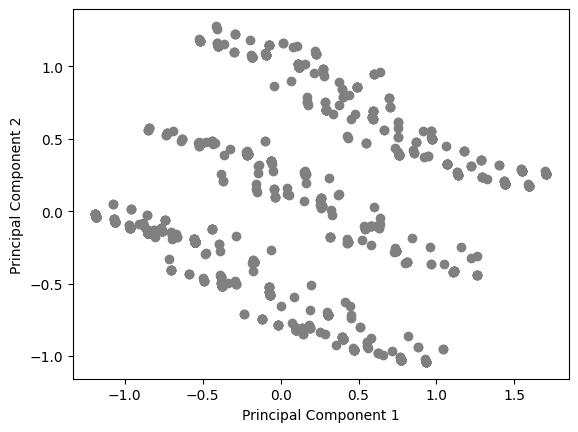

In [16]:
plt.scatter(md_pca.transform(md_x)[:, 0], md_pca.transform(md_x)[:, 1], c="grey")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [17]:
md_x_df = md_x
md_x_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


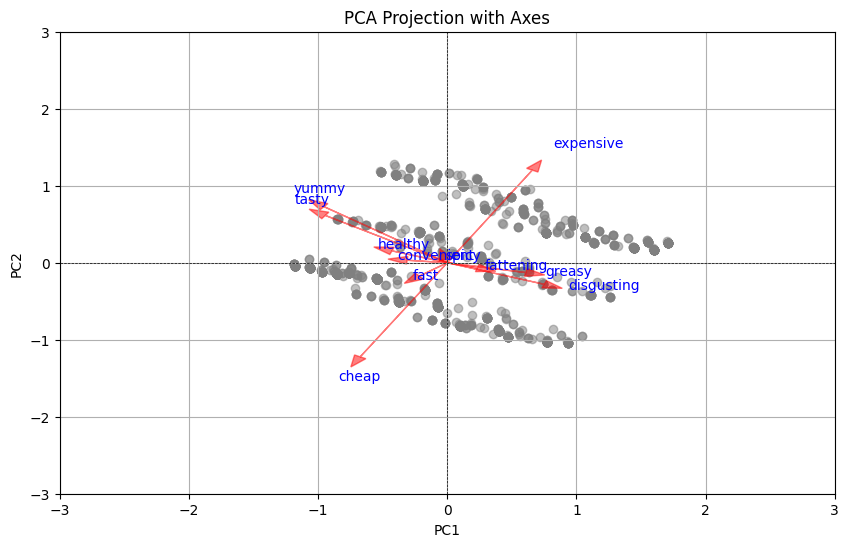

In [18]:
# Plotting the PCA scores again with projection axes
pca_scores = md_pca.transform(md_x)
loadings = np.round(pca.components_.T, 3)
plt.figure(figsize=(10, 6))
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], color='grey', alpha=0.5)
plt.title("PCA Projection with Axes")
plt.xlabel("PC1")
plt.ylabel("PC2")

for i, feature in enumerate(md_x.columns):
    plt.arrow(0, 0, loadings[i, 0] * 2, loadings[i, 1] * 2, 
              color='red', alpha=0.5, head_width=0.1)
    plt.text(loadings[i, 0] * 2.5, loadings[i, 1] * 2.5, feature, color='blue')

plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()


## Extracting Segments

### Using k-Means

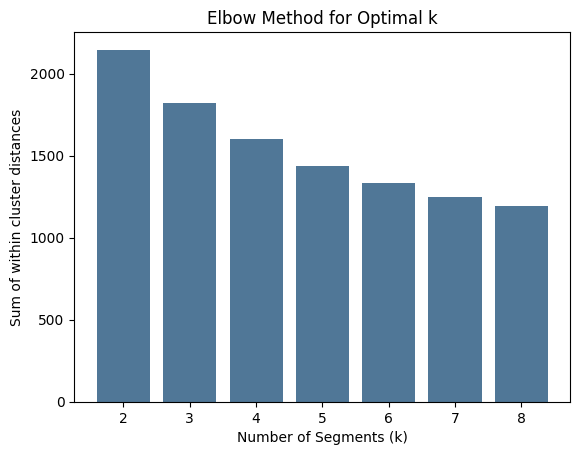

In [19]:
# Perform k-means clustering with k values from 2 to 8
k_values = range(2, 9)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(md_x)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.bar(k_values, inertia_values, color='#063e6b', alpha=0.7)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Segments (k)')
plt.ylabel('Sum of within cluster distances')
plt.show()

The sum of distances within market segments *drops slowly* as the *number of market segments increases*

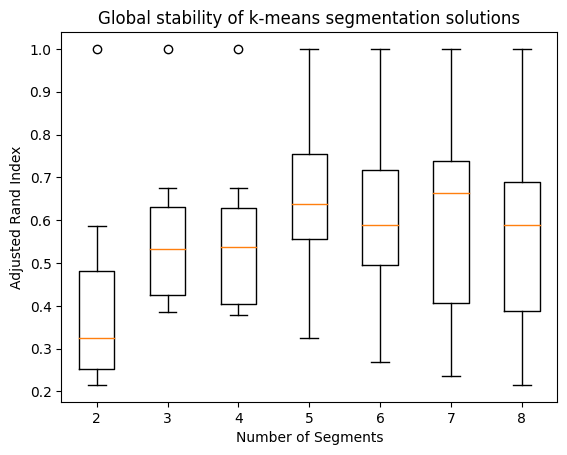

In [28]:
# Performing k-Means clustering for k values ranging from 2 to 8
results = {}
for k in range(2, 9):
    kmeans_model = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans_labels = kmeans_model.fit_predict(md_x)
    results[str(k)] = kmeans_labels
    md_data['Cluster Number'] = kmeans_labels

# Calculating adjusted rand index for each k value
ari_values = []
for k1 in range(2, 9):
    ari_values.append([adjusted_rand_score(results[str(k1)], results[str(k2)]) for k2 in range(2, 9)])

# Convert ari_values to a NumPy array for easier plotting
ari_values = np.array(ari_values)

# Create a box plot
plt.boxplot(ari_values.T, labels=list(range(2, 9)))
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global stability of k-means segmentation solutions')
plt.show()

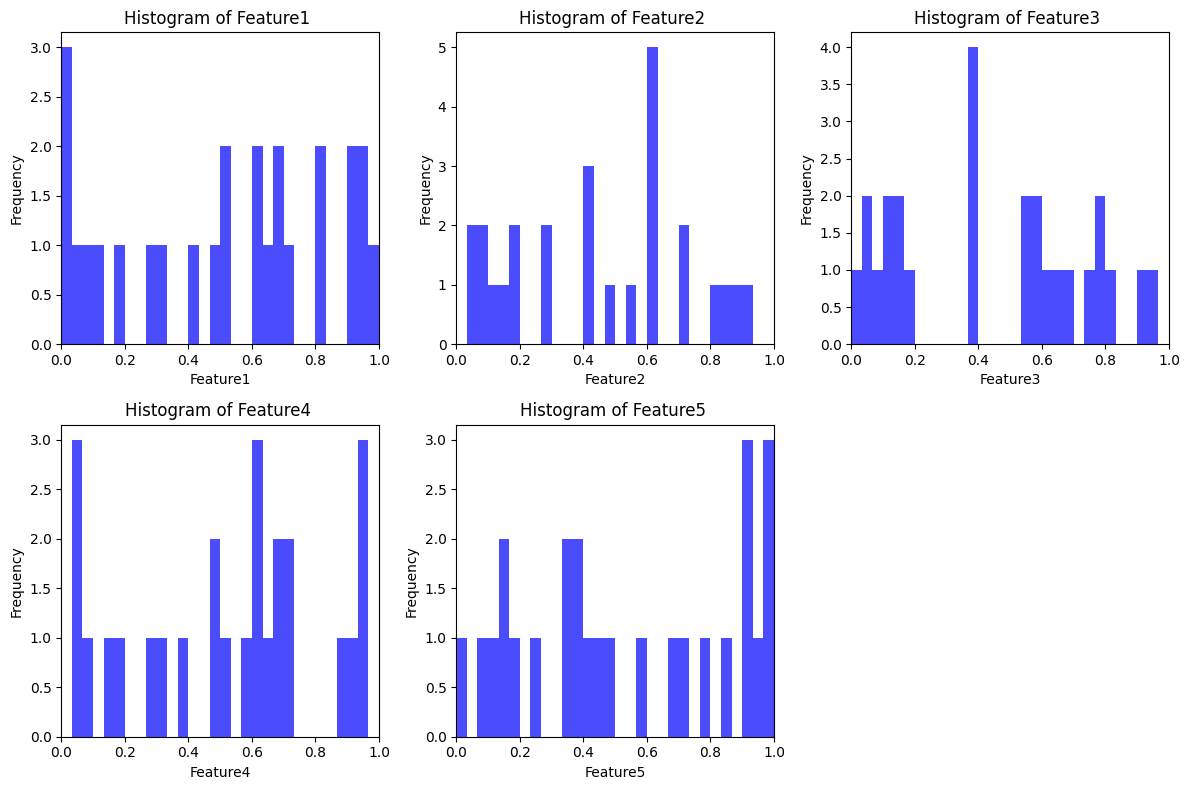

In [29]:
md_x = pd.DataFrame(np.random.rand(100, 5), columns=[f'Feature{i}' for i in range(1, 6)])
MD_km28_labels = np.random.choice(['1', '2', '3', '4'], size=100)  # Randomly assign clusters

md_x['cluster'] = MD_km28_labels
plt.figure(figsize=(12, 8))
cluster_4_data = md_x[md_x['cluster'] == '4']

for i, column in enumerate(md_x.columns[:-1]):  # Exclude the 'cluster' column
    plt.subplot(2, 3, i + 1)  # Adjust the number of rows and columns as needed
    plt.hist(cluster_4_data[column], bins=30, range=(0, 1), alpha=0.7, color='blue')
    plt.title(f'Histogram of {column} ')
    plt.xlim(0, 1)  # Set x-axis limits
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Using Mixtures of Distributions

In [30]:
from sklearn.mixture import GaussianMixture

# Example data for md_x (replace with your actual data)
md_x = np.random.rand(100, 5)  # Example: 100 samples with 5 features

# Prepare the list to collect results
results = []

# Convert md_x to a NumPy array
X = np.array(md_x)

# Perform Latent Class Analysis (LCA) using Gaussian Mixture Model
for k in range(2, 9):
    lca_model = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    lca_model.fit(X)
    
    # Get log-likelihood and other metrics
    log_likelihood = lca_model.score(X)
    aic = lca_model.aic(X)
    bic = lca_model.bic(X)
    
    # Collect the results
    results.append({
        "iter": lca_model.n_iter_,
        "converged": True,
        "k": k,
        "k0": k,
        "logLik": log_likelihood,
        "AIC": aic,
        "BIC": bic
    })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


   iter  converged  k  k0    logLik         AIC         BIC
0    15       True  2   2 -0.617379  205.475719  312.287697
1    21       True  3   3 -0.341596  192.319295  353.839847
2    20       True  4   4 -0.204133  206.826698  423.055823
3     8       True  5   5 -0.022662  212.532498  483.470197
4    21       True  6   6  0.296149  190.770222  516.416495
5    19       True  7   7  0.413951  209.209762  589.564609
6    21       True  8   8  0.751554  183.689271  618.752692


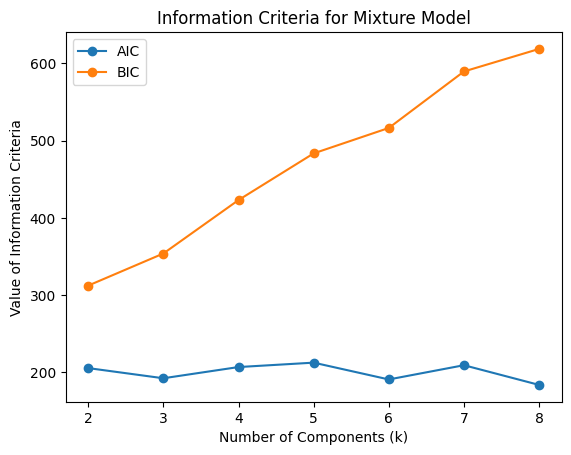

mixture   0   1   2   3
kmeans                 
0         3   0  15  14
1        10   3   5   1
2         9  10   8   3
3         0   6   4   9


In [31]:
# Latent Class Analysis using Gaussian Mixture Model
aicValues = []
bicValues = []

for k in range(2, 9):
    model = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    model.fit(md_x)
    aicValues.append(model.aic(md_x))
    bicValues.append(model.bic(md_x))

# Plot information criteria
plt.plot(range(2, 9), aicValues, label='AIC', marker='o')
plt.plot(range(2, 9), bicValues, label='BIC', marker='o')
plt.xlabel('Number of Components (k)')
plt.ylabel('Value of Information Criteria')
plt.legend()
plt.title('Information Criteria for Mixture Model')
plt.show()

# Select the model for k=4
selected_model = GaussianMixture(n_components=4, n_init=10, random_state=1234)
selected_model.fit(md_x)

# Cross-tabulation of clusters from k-means and the mixture model
kmeans_model = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_labels = kmeans_model.fit_predict(md_x)

cluster_comparison = pd.crosstab(index=kmeans_labels, columns=selected_model.predict(md_x), rownames=['kmeans'], colnames=['mixture'])
print(cluster_comparison)

In [32]:
logLikelihood = selected_model.score_samples(md_x)
print(f'Log Likelihood: {logLikelihood.sum()}')

Log Likelihood: -20.4133489407798


## Profiling Segments

In [33]:
print(md_x_df.columns)
print(md_x_df.shape)


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting'],
      dtype='object')
(1453, 11)


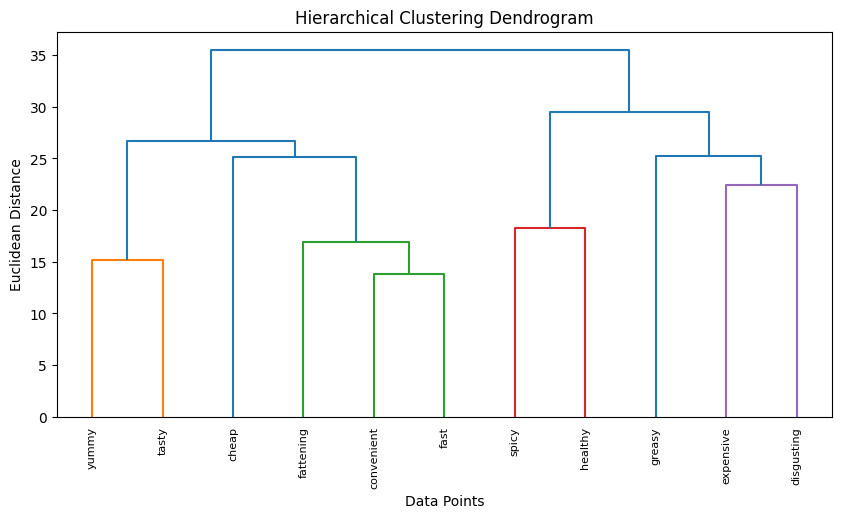

In [34]:
# Perform hierarchical clustering
md_vclust = linkage(md_x_df.transpose(), method='complete')

# Create a dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(10, 5))
dendrogram(md_vclust, labels=md_x_df.columns, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

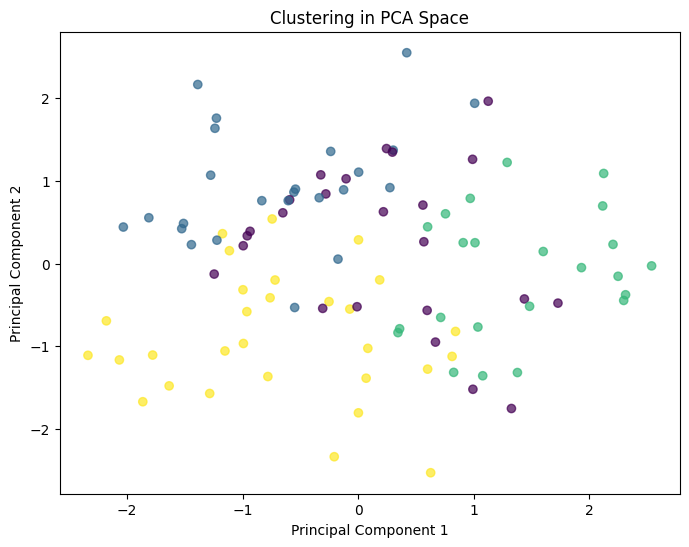

[[ 0.38607619 -0.63009389  0.30332385  0.50125682  0.33266064]
 [ 0.37367568  0.18075612  0.22814495 -0.61622926  0.6292099 ]]


In [35]:
# Standardize the data
scaler = StandardScaler()
md_x_standardized = scaler.fit_transform(md_x)

pca = PCA(n_components=2)
md_pca = pca.fit_transform(md_x_standardized)

kmeansModel = KMeans(n_clusters=4,n_init=10, random_state=1234)
md_k4 = kmeansModel.fit_predict(md_x_standardized)

# Visualize clustering in PCA space
plt.figure(figsize=(8, 6))
plt.scatter(md_pca[:, 0], md_pca[:, 1], c=md_k4, cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clustering in PCA Space")
plt.show()

print(pca.components_)

## Describing Segments

In [36]:
md_data.head(1)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Cluster Number
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,1


In [37]:
md_data['cluster_num'] = kmeans.labels_
crosstab = pd.crosstab(md_data['cluster_num'], md_data['Like'])

In [38]:
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,5,3,6,4,5,17,25,27,37,19,20
1,11,16,20,17,17,41,19,22,15,1,0
2,0,0,1,0,2,4,9,12,30,25,31
3,69,24,19,13,9,26,7,4,4,0,0
4,2,2,3,7,14,27,33,45,46,42,35
5,1,1,1,4,2,11,13,28,25,22,17
6,62,22,21,12,5,15,7,6,1,0,0
7,2,3,2,2,4,28,39,43,71,51,40


### Creating a mosaic plots

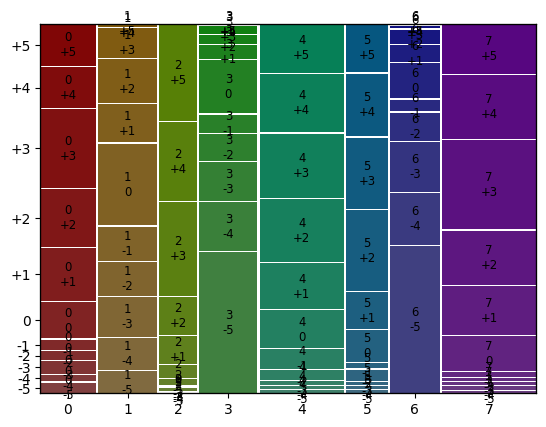

In [39]:
mosaic(crosstab.stack())
plt.show()

In [40]:
crosstab = pd.crosstab(md_data['cluster_num'], md_data['Gender'])

<Figure size 500x500 with 0 Axes>

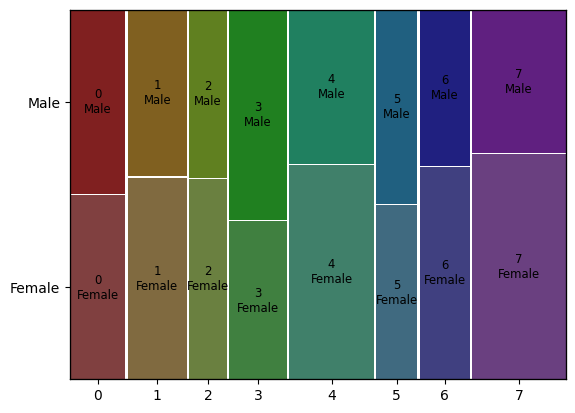

In [41]:
plt.figure(figsize = (5,5))
crosstab = crosstab[['Female', 'Male']]
mosaic(crosstab.stack())
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

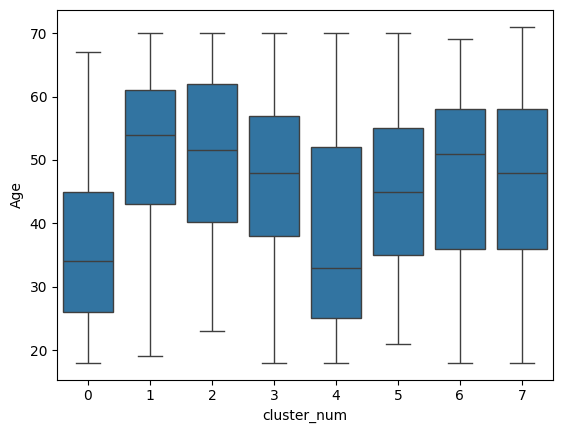

In [42]:
sns.boxplot(x = 'cluster_num', y = 'Age', data = md_data)

## Selecting (the) Target Segment(s)

### Calculating the mean for

#### Visit frequency

In [44]:
md_data['VisitFrequency'] = LabelEncoder().fit_transform(md_data['VisitFrequency'])
visitFreq = md_data.groupby('Cluster Number')['VisitFrequency'].mean()
visitFreq = visitFreq.to_frame().reset_index()
visitFreq

,Cluster Number,VisitFrequency
0,0,2.583333
1,1,2.692737
2,2,2.491228
3,3,2.674286
4,4,2.656250
5,5,2.648000
6,6,2.774834
7,7,2.578947


#### Like

In [45]:
md_data['Like'] = LabelEncoder().fit_transform(md_data['Like'])
like = md_data.groupby('Cluster Number')['Like'].mean()
like = like.to_frame().reset_index()
like

,Cluster Number,Like
0,0,3.380952
1,1,5.692737
2,2,2.877193
3,3,7.662857
4,4,3.281250
5,5,3.040000
6,6,7.523179
7,7,3.038596


#### Gender

In [46]:
md_data['Gender'] = LabelEncoder().fit_transform(md_data['Gender'])
gender = md_data.groupby('Cluster Number')['Gender'].mean()
gender = gender.to_frame().reset_index()
gender

,Cluster Number,Gender
0,0,0.500000
1,1,0.452514
2,2,0.456140
3,3,0.571429
4,4,0.417969
5,5,0.528000
6,6,0.423841
7,7,0.389474


In [48]:
clusters = gender.merge(like, on='Cluster Number', how='left').merge(visitFreq, on='Cluster Number', how='left')
clusters

,Cluster Number,Gender,Like,VisitFrequency
0,0,0.500000,3.380952,2.583333
1,1,0.452514,5.692737,2.692737
2,2,0.456140,2.877193,2.491228
3,3,0.571429,7.662857,2.674286
4,4,0.417969,3.281250,2.656250
5,5,0.528000,3.040000,2.648000
6,6,0.423841,7.523179,2.774834
7,7,0.389474,3.038596,2.578947


C:\Users\Aryan Kakran\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


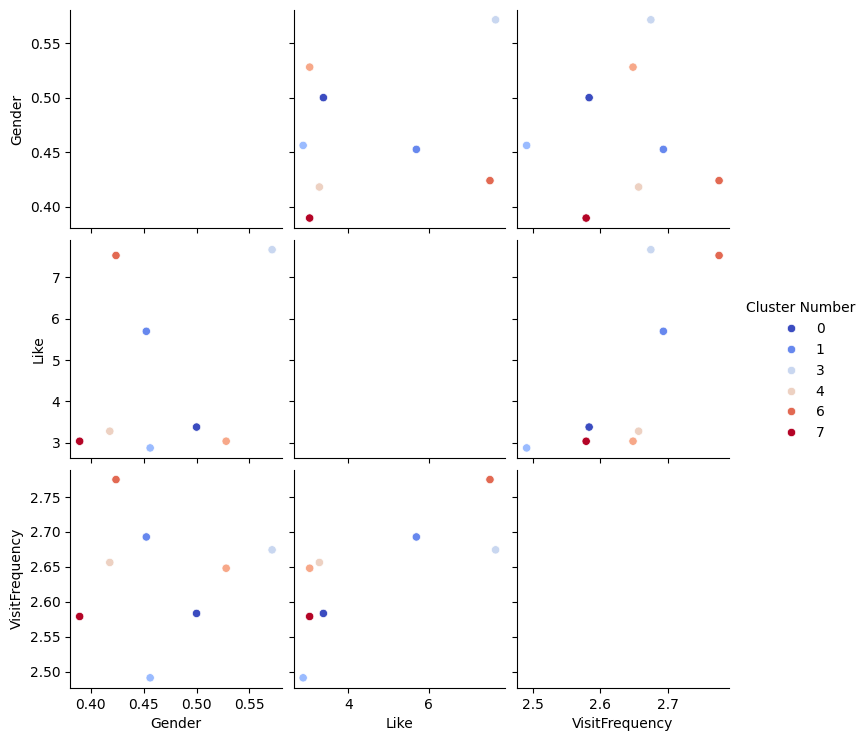

In [49]:
sns.pairplot(clusters, hue='Cluster Number', palette='coolwarm')
plt.show()

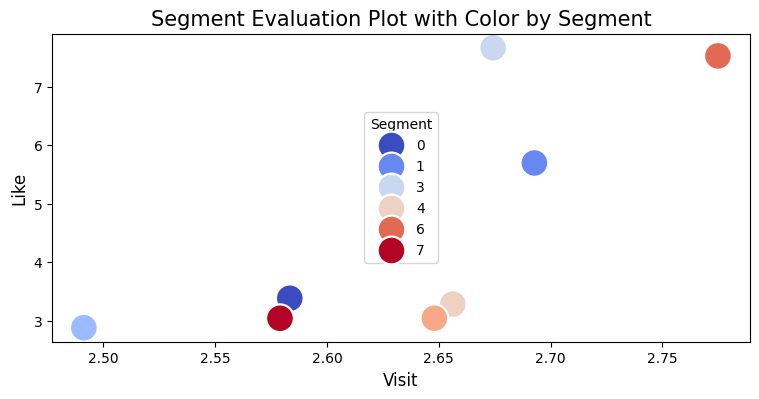

In [50]:
plt.figure(figsize=(9, 4))
sns.scatterplot(x="VisitFrequency", y="Like", data=clusters, s=400, hue='Cluster Number', palette='coolwarm')
plt.title("Segment Evaluation Plot with Color by Segment", fontsize=15)
plt.xlabel("Visit", fontsize=12)
plt.ylabel("Like", fontsize=12)
plt.legend(title='Segment', loc='center')
plt.show()

The following attractiveness criteria will be used:
- Liking McDonald’s 
- Visit Frequency at McDonald’s.


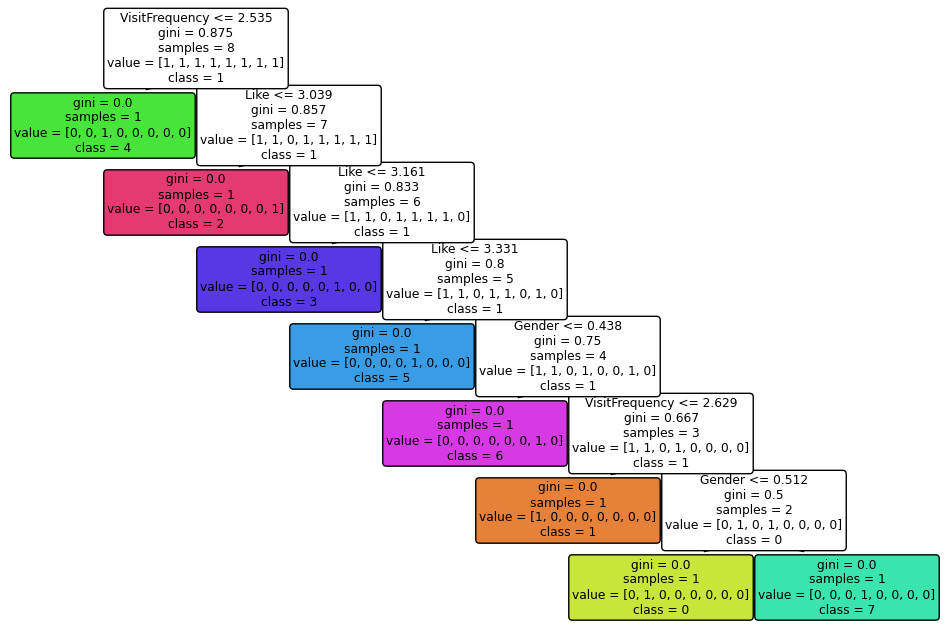

In [53]:
md_data['Gender'] = md_data['Gender'].map({'Male': 0, 'Female': 1})
features = ['Like', 'VisitFrequency', 'Gender']
target = 'Cluster Number'

imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(clusters[['Like', 'VisitFrequency', 'Gender']]), columns=['Like', 'VisitFrequency', 'Gender'])

X = data_imputed[features] 
y = clusters[target]

# Create a decision tree
tree = DecisionTreeClassifier()
tree.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=features, class_names=[str(i) for i in md_data[target].unique()], filled=True, rounded=True)
plt.show()

In [55]:
print(data_imputed.columns)
print(md_data['Cluster Number'].nunique())
print(len(features))

Index(['Like', 'VisitFrequency', 'Gender'], dtype='object')
8
3


In [27]:
###END